**Importing Libraries and Data Processing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\SVM\\bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [4]:
df.shape

(700, 9)

In [5]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553457,3.058229,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117209,3.287524,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.010000,0.050000,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.370000,1.047500,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.855000,1.985000,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.905000,3.927500,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.560000,27.030000,1.000000


In [6]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [7]:
df.drop(['address','ed','debtinc','employ'],axis=1,inplace=True)

In [8]:
df.head()

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0
3,41,120,2.66,0.82,0
4,24,28,1.79,3.06,1


In [9]:
x=df.iloc[:,0:4]
y=df['default']
print(x.shape)
print(y.shape)

(700, 4)
(700,)


**Model BUilding**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=0)

In [12]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc

In [13]:
svct=SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(xtrain,ytrain)
print(svct)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


In [14]:
ypred=svct.predict(xtest)
ypred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

**Classifcation_report,Confusion Matrix and ROC Curve**

In [15]:
confusion_matrix(ytest,ypred)

array([[194,  12],
       [ 60,  14]], dtype=int64)

In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       206
           1       0.54      0.19      0.28        74

    accuracy                           0.74       280
   macro avg       0.65      0.57      0.56       280
weighted avg       0.70      0.74      0.69       280



In [17]:
preds1=svct.predict_proba(xtest)[:,1]
preds1

array([0.18347063, 0.58004068, 0.23201665, 0.72896233, 0.22841159,
       0.19455482, 0.48393393, 0.28966974, 0.06970298, 0.04743363,
       0.0838683 , 0.21350853, 0.14789696, 0.18278962, 0.33107682,
       0.1013131 , 0.14614059, 0.03347366, 0.51570189, 0.08347786,
       0.13428731, 0.48190919, 0.21668451, 0.11235679, 0.28470893,
       0.1685232 , 0.27796573, 0.18575475, 0.57485745, 0.37036805,
       0.26292978, 0.27232821, 0.18544827, 0.52121841, 0.12912646,
       0.16642478, 0.08096631, 0.42270658, 0.07795229, 0.34255575,
       0.1169017 , 0.18168191, 0.15093876, 0.08608221, 0.29038685,
       0.36185484, 0.25131016, 0.13286765, 0.19593458, 0.22390476,
       0.3535736 , 0.17095906, 0.20184649, 0.65044981, 0.28383431,
       0.26908751, 0.16230954, 0.04489654, 0.43698467, 0.14237043,
       0.12491799, 0.28074297, 0.18021301, 0.77428279, 0.21163562,
       0.19930928, 0.4846991 , 0.16162192, 0.22482209, 0.12547001,
       0.17808714, 0.20945885, 0.31139988, 0.17902415, 0.20621

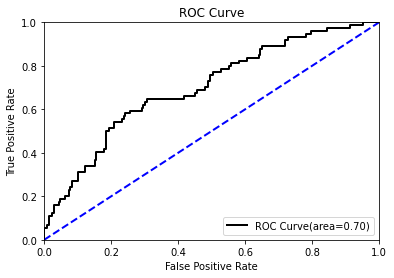

In [22]:
plt.figure()
plt.plot(fpr1,tpr1,color='black',lw=2,label='ROC Curve(area=%0.2f)'%auc1)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
fpr1,tpr1,thresholds1=roc_curve(ytest,preds1)

In [20]:
auc1=auc(fpr1,tpr1)

In [21]:
auc1

0.6995539228548938